# Example: MINST-FASHION

## Loading some library and setting some basic parameters

In [3]:
import torch
import torch.nn as nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [22]:
lr = 0.15
gamma = 0
epochs = 10
bs = 128

## Loading data and batch dataset

In [4]:
mnist = torchvision.datasets.FashionMNIST(root=r"E:\Deeplearning_basic\Untitled Folder\data",
                                          train=True,
                                          download=True,
                                          transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw


  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw


  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw


  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to E:\Deeplearning_basic\Untitled Folder\data\FashionMNIST\raw
Processing...
Done!


C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
len(mnist)

60000

In [8]:
mnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

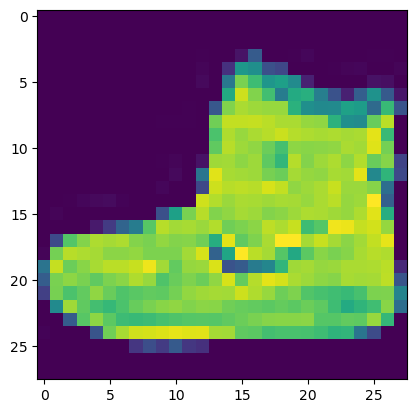

In [9]:
import matplotlib.pyplot as plt
plt.imshow(mnist[0][0].view((28, 28)).numpy())

In [11]:
batchdata = DataLoader(mnist, batch_size=bs, shuffle=True)

In [16]:
input_ = mnist.data[0].numel()
input_

784

In [17]:
output_ = len(mnist.targets.unique())
output_

10

## define Model

In [19]:
class Model(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super().__init__()
        self.normalize = nn.BatchNorm2d(num_features=1)
        self.linear1 = nn.Linear(in_features, 128, bias=False)
        self.output = nn.Linear(128, out_features, bias=False)

    def forward(self, x):
        x = self.normalize(x)
        x = x.view(-1, 28*28)
        sigma1 = torch.relu(self.linear1(x))
        z2 = self.output(sigma1)
        sigma2 = F.log_softmax(z2, dim=1)
        return sigma2

## define train

In [26]:
def fit(net, batchdata, lr=0.01, epochs=5, gamma=0):
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=gamma)
    correct = 0
    samples = 0
    for epoch in range(epochs):
        for batch_idx, (x, y) in enumerate(batchdata):
            y = y.view(x.shape[0])
            sigma = net.forward(x)
            loss = criterion(sigma, y)
            loss.backward()
            opt.step()
            opt.zero_grad()

            yhat = torch.max(sigma, 1)[1]
            correct += torch.sum(yhat == y)
            samples += x.shape[0]

            if (batch_idx+1) % 125 == 0 or batch_idx == len(batchdata)-1:
                print('Epoch{}:[{}/{}({:.0f}%)]\tLoss:{:.6f}\t Accuracy:{:.3f}'.format(
                    epoch+1, samples, len(batchdata.dataset)*epochs, 100*samples/(len(batchdata.dataset)*epochs), loss.data.item(), float(correct*100)/samples))

In [27]:
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
fit(net, batchdata, lr=lr, epochs=epochs, gamma=gamma)

Epoch1:[16000/600000(3%)]	Loss:0.681106	 Accuracy:73.588
Epoch1:[32000/600000(5%)]	Loss:0.456472	 Accuracy:77.431
Epoch1:[48000/600000(8%)]	Loss:0.520036	 Accuracy:79.600
Epoch1:[60000/600000(10%)]	Loss:0.401977	 Accuracy:80.682
Epoch2:[76000/600000(13%)]	Loss:0.413218	 Accuracy:81.755
Epoch2:[92000/600000(15%)]	Loss:0.435151	 Accuracy:82.529
Epoch2:[108000/600000(18%)]	Loss:0.461325	 Accuracy:83.090
Epoch2:[120000/600000(20%)]	Loss:0.282380	 Accuracy:83.448
Epoch3:[136000/600000(23%)]	Loss:0.355174	 Accuracy:83.955
Epoch3:[152000/600000(25%)]	Loss:0.284532	 Accuracy:84.334
Epoch3:[168000/600000(28%)]	Loss:0.265914	 Accuracy:84.661
Epoch3:[180000/600000(30%)]	Loss:0.381284	 Accuracy:84.866
Epoch4:[196000/600000(33%)]	Loss:0.347258	 Accuracy:85.151
Epoch4:[212000/600000(35%)]	Loss:0.398573	 Accuracy:85.450
Epoch4:[228000/600000(38%)]	Loss:0.249681	 Accuracy:85.665
Epoch4:[240000/600000(40%)]	Loss:0.160493	 Accuracy:85.814
Epoch5:[256000/600000(43%)]	Loss:0.347868	 Accuracy:86.044
Epoch5